# TP2 Séparateurs à Vaste Marge
by Maxime TCHIBOZO and Dimitri THEVENEAU

In [106]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [107]:
def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y


In [108]:
X,y = load_breastcancer("wdbcM1B0.data")

In [109]:
X = np.insert(X,X.shape[1],1,axis=1) #We add a column of ones for question 2.4

In [110]:
X.shape

(569, 31)

In [111]:
X.transpose()

array([[ 1.09706398,  1.82982061,  1.57988811, ...,  0.70228425,
         1.83834103, -1.80840125],
       [-2.07333501, -0.35363241,  0.45618695, ...,  2.0455738 ,
         2.33645719,  1.22179204],
       [ 1.26993369,  1.68595471,  1.56650313, ...,  0.67267578,
         1.98252415, -1.81438851],
       ...,
       [ 2.75062224, -0.24388967,  1.152255  , ..., -1.10454895,
         1.91908301, -0.04813821],
       [ 1.93701461,  0.28118999,  0.20139121, ..., -0.31840916,
         2.21963528, -0.75120669],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

# Question 2.1

We want to solve
\begin{align}
\min_{v\in\mathbb{R},a\in\mathbb{R},\epsilon\in\mathbb{R}^n}&{\frac{1}{2}\sum{v_j^2}+c\sum{\epsilon_i}} \\
&\epsilon_{i}\geq{0} \\
&\epsilon_{i}\geq{1-y_{i}(x_i^{T}v+a)}
\end{align}
wich is equivalent to 
\begin{align}
\min_{v\in\mathbb{R},a\in\mathbb{R},\epsilon\in\mathbb{R}^n}&{\frac{1}{2}\sum{v_j^2}+c\sum{\epsilon_i}} \\
&\epsilon_{i}\geq{max(0,1-y_{i}(x_i^{T}v+a))} 
\end{align}
The conditions give
\begin{equation}
\forall{\epsilon\in\mathbb{R}^n},\sum{\epsilon_i}\geq{\sum{max(0,1-y_{i}(x_i^{T}v+a))}}
\end{equation}

As $c>0$, the optimal $\epsilon$ is obtained for $\epsilon_i=max(0,1-y_{i}(x_i^{T}v+a)$

The probleme is thus equivalent to
\begin{equation}
\min_{v\in\mathbb{R},a\in\mathbb{R}}{\frac{1}{2}\sum{v_j^2}+c\sum{max(0,1-y_{i}(x_i^{T}v+a)}} \\
\end{equation}

# Question 2.2

In [112]:
Z = np.linspace(-5,7,100)


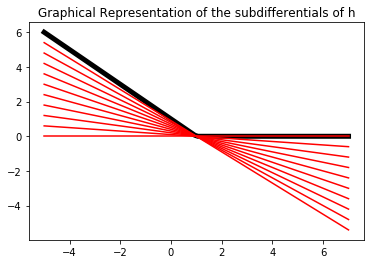

In [113]:
plt.plot(Z,[max(0,1-z) for z in Z], 'black', linewidth=5)
for i in range(10):
    plt.plot(Z,[-i/10*(z-1) for z in Z],color='r')
plt.title("Graphical Representation of the subdifferentials of h")
plt.show()

We observe that when $x < 1$ the subdifferential is equal to the slope : $\{-1\}$


When $x>1$, the subdifferential is also equal to the slope : $\{0\}$

Finally, for $x=0$, we observe that all the slopes in the interval $[-1,0]$ are underneath the h function

# Question 2.3

$f(v,a) = \frac{1}{2}\cdotp\sum_{j=1}^{m} v^2_j  + c\cdotp\sum_{i=1}^{n}max(0,1-y_i(x_i^Tv+a)) $

We want to find N and H separable such that :

$f(v,a) = N(v,a) + c\cdotp H(M(v,a))$

For $N(v,a)$ : 

We choose $N(v,a) = \sum_{j=1}^{m} h_j $ with $ h_j(v) = \frac{1}{2}v_j^2$  which is a separable function.

For $H(v,a)$ and $M(v,a)$ :

$H(v,a)\cdotp M(v,a) = \sum_{i=1}^{n}max(0,1-y_i(x_i^Tv+a)) $

First, we put of all the $y_i$ values in a diagonal matrix D:

$D = \begin{pmatrix}
y_1 & ... & 0 \\
... & ... & ...\\
 0 & ... & y_n
\end{pmatrix}$

We create another matrix L with each observation $x_i^T$ concatenated with a column of ones (this is so we can introduce the constant a=1 for each observation.

$L= \begin{pmatrix}
x_1^T & 1 \\
... & ...\\
 x_n^T & 1
\end{pmatrix}$

We then create the Matrix M which such that $M = D\cdotp L $

Finally, we have : 

$M(v,a) = M \cdotp \begin{pmatrix} v\\a\end{pmatrix}$

M is separable : 

$M = \sum_{i = 1}^{n} m_i $ Where $ m_i = \begin{pmatrix}
0 & 0 \\
x_i^T & 1\\
 0 & 0
\end{pmatrix}$

Finally, $H = \sum_{i=1}^{n}h_i $ Where $ h_i(W) = max(0,1-w_i)$  for vector $W$ is separable (in practive W will be the product of $M$ and $\begin{pmatrix}v\\a\end{pmatrix}$.



# subdifferentials of f

$f(v,a) = N(v,a) + c\cdotp H(M(v,a))$ so $\delta f(v,a) = \delta N(v,a) + c\cdotp \delta [ H(M(v,a))]$

$\delta N(v,a) = \begin{pmatrix} v \\ 0 \end{pmatrix} $

M is a linear operator so $\nabla (H(M(v,a)) = M^T\nabla H(M(v,a)) $  (see paragraph 2.4, p.13 of the polycopié).

$\delta H(W) = \delta h_1(w_1) \times ... \times \delta h_n(w_n) $ where $ \times $ denotes the cartesian product and for all i, $ \delta h_i (w_i)  $ is the subdifferential of $max(0,1-w_i)$

# Question 2.4 

In [114]:
def delta_H(z):
    # gives a subdgradient of h taken randomly in the subgradient
    return ((z<1)*(-1)+(np.random.rand(1)[0]-1)*(z==1))

In [115]:
def f(v,a): 
    v_sum = 1/2*sum([v[j]**2 for j in range(len(v))])
    # diagonal matrix containing y
    D = np.diag(y)
    M = np.dot(X.transpose(),D)#with ones
    M_v_a = np.dot(M.transpose(),np.concatenate((v,[a]),axis=0))
    c_sum = sum([max(0,1-M_v_a[i]) for i in range(len(M_v_a))])
    #value of the function
    return v_sum+c_sum

In [116]:
def gradient(v,a):
    #We compute the value of the gradient
    n_grad = np.concatenate((v,[0]),axis=0)
    D = np.diag(y)
    M = np.dot(D,X)#with ones
    # the matrice Mva from question 3 
    M_v_a = np.dot(M,np.concatenate((v,[a]),axis=0))
    deltah = np.array([delta_H(z) for z in M_v_a])
    h_grad = np.dot(M.T,deltah)
    return (n_grad + h_grad)


In [117]:
v = np.ones(30)
f(v,1)

603.8252882581148

In [118]:
gradient(v,1)

array([-38.73829648, -20.70475549, -34.49379607, -34.9876155 ,
        38.59618269,  45.35166232,  23.55585667,   1.95675574,
        36.5927392 ,  89.42902745,  -6.13062046,  28.6170554 ,
         0.18689247, -13.53182243,  59.92957203,  84.51089819,
        72.68924277,  60.05022852,  41.47511889,  99.88454603,
       -39.4982886 , -27.61455329, -34.31830559, -34.37001474,
        18.65124737,  28.15298039,  20.26382933,  -2.07793185,
        -2.28514378,  55.68259705,  26.        ])

# Question 2.5

In [119]:
def sous_gradient(v0,a0):
    gk = gradient(v0,a0)
    xk = np.zeros(31)
    k = 1    
    while k<1000: 
        k += 1
        xk -= 1/(k+1)*gk
        gk = gradient(xk[:-1],xk[-1])
    return xk

In [120]:
v = np.zeros(30)

In [121]:
tmp = sous_gradient(v,0)

In [122]:
print("The subgradient method gives us a mininumum of : "+ str(f(tmp[:-1],tmp[-1])) + " given the initial conditions (v0,a0)=0")

The subgradient method gives us a mininumum of : 27.013625854193027 given the initial conditions (v0,a0)=0


# Question 3.1

\begin{equation}
\mathbb{E}(f_I(v,a))=\sum_i{f_i(v,a)\mathbb{P}(I=i)}
\end{equation}

$I$ follows a uniform distribution thus 

\begin{align}
\mathbb{E}(f_I(v,a))&=\frac{1}{n}\sum_i{f_i(v,a)} \\
                    &=\frac{1}{2}\sum_{j=1}^{m}{v_j^2}+\frac{1}{n}\sum_{i=1}^n{cn\max{0,1-y_i(x_i^{T}v+a}}) \\
                    &=\frac{1}{2}\sum_{j=1}^{m}{v_j^2}+\sum_{i=1}^n{c\max{0,1-y_i(x_i^{T}v+a}}) \\
                    &= f(v,a)
\end{align}

# Question 3.2

We have 
\begin{equation}
f_i(v,a)= \frac{1}{2}\sum_{j=1}^{m}{v_j^2}+cn\max\left({0,1-y_i(x_i^{T}v+a})\right)
\end{equation}
Thus 
\begin{align}
\frac{\partial f_i}{\partial v}= v+cn y_i x_i^{T} \partial{h}(1-y_i(x_i^{T}v+a))
\end{align}
\begin{align}
\frac{\partial f_i}{\partial a}= cn\partial{h}(1-y_i(x_i^{T}v+a))
\end{align}
\begin{align}
\partial f_i= \begin{pmatrix}v\\0\end{pmatrix} + cn\partial{h}(1-y_i(x_i^{T}v+a))\begin{pmatrix}y_ix_i\\y_i\end{pmatrix}
\end{align}

# Question 3.3

In [123]:
X.T.shape

(31, 569)

In [124]:
def partial_diferential(i,v,a):
    # differential according to component i 
    n_grad = np.concatenate((v,[0]),axis=0)
    # we take a vector composed of v and a zero 
    v_a_vector = np.concatenate((v,[a]),axis=0)
    h_grad = delta_H(y[i]*(np.dot(X[i].T,v_a_vector)))*y[i]*X[i]
    return (n_grad + h_grad)


In [125]:
def sous_gradient_stochastique(v0,a0):
    i = int(np.random.rand()*X.shape[0])
    gk = partial_diferential(i,v0,a0)
    xk = np.zeros(31)  
    for k in range(10000):
        i = int(np.random.rand()*X.shape[0])
        xk -= 1/(k+1)*gk
        gk = partial_diferential(i,xk[:-1],xk[-1])
    return xk

In [126]:
v0 = np.zeros(30)
sous_gradient_stochastique(v0,0)

array([ 0.10687791,  0.07885184,  0.10563486,  0.10144518,  0.03890702,
        0.04306535,  0.08381475,  0.10899245,  0.0446166 , -0.04455313,
        0.08600415, -0.00757356,  0.07457836,  0.07462854,  0.0155219 ,
       -0.00550516, -0.01701538,  0.02746694, -0.00844716, -0.03897408,
        0.12149655,  0.09668428,  0.11738145,  0.10935703,  0.09349782,
        0.06869462,  0.0814195 ,  0.11746684,  0.08614509,  0.03910089,
       -0.40626411])

In [127]:
tmp = sous_gradient_stochastique(v0,0)

In [131]:
print("the value obtained is "+str(f(tmp[:-1],tmp[-1])))

the value obtained is 103.24863439860698


# Question 4.1

The Lagrangian function associated to problem (1) is :
$L(v,a,\phi,\psi)=\frac{1}{2} \sum_{j=1}^{m} v_j^2 +c\sum_{i=1}^{n}\xi_i-\sum_{i=1}^{n}\langle \phi_i,\xi_i\rangle - \sum_{i=1}^{n}\langle \psi_i,1-\xi_i-y_i(x_i^Tv+a)\rangle + \tau_{\mathbb{R_{+}^{n}}}(\psi) + \tau_{\mathbb{R_{+}^{n}}}(\phi)$

# Question 4.2

# Gradient of g with respect to x :




$g(x,\phi) = - \frac{1}{2\rho}\phi^2 + \frac{\rho}{2}(max(0,x+\rho^{-1}\phi))^2$




$\nabla_x g (x,\phi) = 2\cdotp\max(0,x + \rho^{-1}\phi)\cdotp\frac{\rho}{2}\frac{d}{dx}(max(0,x + \rho^{-1}\phi))$


Case 1 : $max(0,x + \rho^{-1}\phi) = 0$ $\Longrightarrow$ $\frac{d}{dx}(max(0,x + \rho^{-1}\phi)) = 0$


Case 2 : $max(0,x + \rho^{-1}\phi) = x + \rho^{-1}\phi$ $\Longrightarrow$ $\frac{d}{dx}(max(0,x + \rho^{-1}\phi)) = \frac{d}{dx}(x + \rho^{-1}\phi) = 1$

In all cases : $\nabla_x g (x,\phi) = \rho \cdotp\max(0,x + \rho^{-1}\phi)$

# Gradient of g with respect to $\phi$ :



$\nabla_\phi g (x,\phi) = -\frac{1}{\rho}\cdotp\phi + \rho\cdotp\max(0,x + \rho^{-1}\phi)\cdotp\frac{d}{d\phi}(max(0,x + \rho^{-1}\phi))$

Using the same logic, we have in all cases : $\frac{d}{d\phi}(\max(0,x + \rho^{-1}\phi)) = \rho^{-1} $ or 0
    
Therefore : 

$\nabla_\phi g (x,\phi) = -\rho^{-1}\cdotp\phi + \max(0,x + \rho^{-1}\phi)$

If $ \max(0,x + \rho^{-1}\phi)=0 $ then $\nabla_\phi g (x,\phi) = -\rho^{-1}\cdotp\phi $ 


$ \iff $ If $ \max(-\rho^{-1}\phi,x )=0 $ then $\nabla_\phi g (x,\phi) = -\rho^{-1}\cdotp\phi $ 

Otherwise, $\nabla_\phi g (x,\phi) = x$

Thus, $\nabla_\phi g (x,\phi) = \max(-\rho^{-1}\phi,x ) $



# Question 4.3

When $x\leq\frac{-\phi}{\rho}$:

$\nabla_x^{2}g(x,\phi)=0$

$\nabla_\phi^{2}g(x,\phi)=-\frac{1}{\rho}$

When $x>\frac{-\phi}{\rho}$:

$\nabla_x^{2}g(x,\phi)=\rho>0$

$\nabla_\phi^{2}g(x,\phi)=0$


In all cases, the Hessian of $x\rightarrow g(x,\phi)$ is always positive (in $\mathbb{R}$),therefore $x\rightarrow g(x,\phi)$ is convex.

In all cases, the Hessian of $\phi\rightarrow g(x,\phi)$ is always negative (in $\mathbb{R}$),therefore $\phi\rightarrow g(x,\phi)$ is concave.


# Question 4.4

In [93]:
x = X.copy()
eps = 1 
p = 2
dy = np.diag(y)

v0 = np.zeros(31)
a0 = 0

z0 = np.zeros((len(y),))
ph0 = np.zeros((len(y),))
ph1 = np.zeros((len(y),))

def g(x,ph):
    -ph**2/2/p + p*(max(0,x+ph/p)**2)/2

def grad_g_x(x,ph):
    #gradient with respect to x
    grad_x = p*max(0,x+ph/p)
    return (grad_x)

def grad_g_phi(x,ph):
    #gradient with respect to phi 
    grad_phi = max(-ph/p,x)
    return (grad_phi)

vect_grad_x = np.vectorize(grad_g_x)

vect_grad_phi= np.vectorize(grad_g_phi)

def Lp(v,a,z,ph0,ph1):
    # value of the lagrangian function
    return (v*v).sum()/2 +z.sum() + gv(-z,ph1).sum() + gv(-z+1-dy.dot(x.dot(v)+a),ph0).sum()

def grad_Lp(v,a,z):
    # gradient of the lagrangian
    gradv = v - (dy.dot(x).T).dot(vect_grad_x(-z+1-dy.dot(x.dot(v)+a),ph0))
    grada = -np.array(dy.dot(vect_grad_x(-z+1-dy.dot(x.dot(v)+a),ph0))).sum
    gradz = np.ones(z.shape) - vect_grad_x(-z,ph1) - vect_grad_x(-z+1-dy.dot(x.dot(v)+a),ph0)
    return gradv, grada, gradz

In [99]:
ph0 = np.zeros((len(y),))
ph1 = np.zeros((len(y),))


def gradient_descent_lagrangian(ph0,ph1)   :
    v0 = np.zeros(31)
    a0 = 0
    z0 = np.zeros((len(y),))
    
    gradv, grada, gradz = grad_Lp(v0,a0,z0)
    norm = np.linalg.norm(gradv)+ np.linalg.norm(grada)+ np.linalg.norm(gradz)
    it = 0
    while norm > eps and it < 100:
        # We add a constant so that it doesn't diverge
        v0 -= gradv/(it+500) 
        a0 -= grada/(it+500)
        z0 -= gradz/(it+500)
        gradv, grada, gradz = grad_Lp(v0,a0,z0)
        norm = np.linalg.norm(gradv)+ np.linalg.norm(grada)+ np.linalg.norm(gradz)
        valeur = Lp(v0,a0,z0,ph0,ph1)
        it+=1
    return v0,a0,z0


# Question 4.5

In [103]:
def grad_phi_lp(v,a,z,ph0,ph1):
    grad_phi_0 = vect_grad_phi(-z+1-dy.dot(x.dot(v)+a),ph0)
    grad_phi_1 = vect_grad_phi(-z,ph1)
    return grad_phi_0,grad_phi_1

# Question 4.6

In [ ]:
ph0 = np.zeros((len(y),))
ph1 = np.zeros((len(y),))


for i in range(1000):
    vk,ak,zk = gradient_descent_lagrangian(ph0,ph1)
    gph0 , gph1 = grad_phi(vk,ak,zk,ph0,ph1)
    ph0 += p*gph0
    ph1 += p*gph1

Lp(vk,ak,zk,ph0,ph1)